<a href="https://colab.research.google.com/github/sberniz/shopify_ds_intership/blob/main/shopify_intership_challenge_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns;
FILE_URL = "/content/drive/MyDrive/Shopify_challenge/2019 Winter Data Science Intern Challenge Data Set.csv"
df = pd.read_csv(FILE_URL)

In [2]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [3]:
df['shop_id'].nunique()

100

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [5]:
df['created_at'] = pd.to_datetime(df['created_at'],infer_datetime_format=True)

In [6]:
df.dtypes

order_id                   int64
shop_id                    int64
user_id                    int64
order_amount               int64
total_items                int64
payment_method            object
created_at        datetime64[ns]
dtype: object

In [7]:
df['created_at'].nunique()

4991

In [8]:
df['shop_id'].value_counts(dropna=False)

53    68
71    66
19    64
13    63
89    61
      ..
74    38
56    37
67    37
38    35
85    35
Name: shop_id, Length: 100, dtype: int64

In [9]:
df['order_amount'].mean()

3145.128

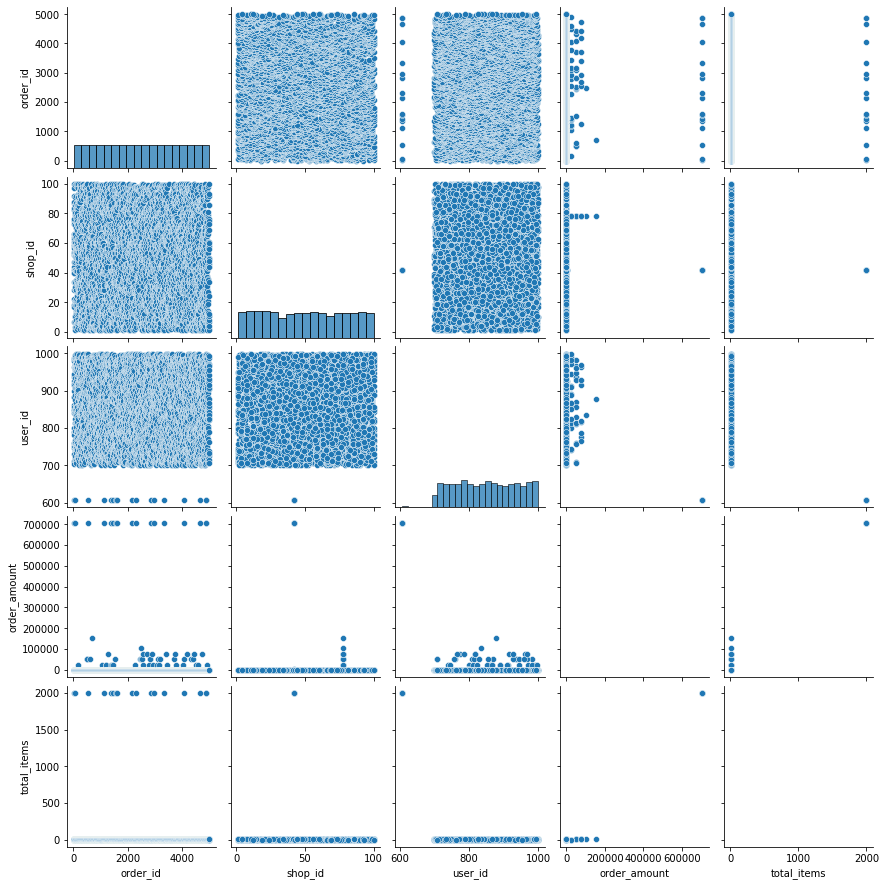

In [10]:
sns.pairplot(df);

In [11]:
df_modified = df.copy()
df_modified['price_per_shoe'] = df_modified['order_amount'] / df['total_items']
df_modified.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,price_per_shoe
0,1,53,746,224,2,cash,2017-03-13 12:36:56,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90.0
2,3,44,861,144,1,cash,2017-03-14 04:23:56,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,156.0
4,5,18,883,156,1,credit_card,2017-03-01 04:35:11,156.0


In [12]:
df_modified.describe()

,order_id,shop_id,user_id,order_amount,total_items,price_per_shoe
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720,387.742800
std,1443.520003,29.006118,87.798982,41282.539349,116.32032,2441.963725
min,1.000000,1.000000,607.000000,90.000000,1.00000,90.000000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000,133.000000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000,153.000000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000,169.000000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000,25725.000000


In [13]:
df.head(1)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56


In [31]:
df_modified['order_amount'].value_counts().sort_index()

90        18
94        25
101       15
111       16
112       48
          ..
51450     16
77175      9
102900     1
154350     1
704000    17
Name: order_amount, Length: 258, dtype: int64

In [26]:
df_modified['price_per_shoe'].sort_values(ascending=False).value_counts().sort_index()

90.0        42
94.0        55
101.0       42
111.0       40
112.0      124
114.0       59
116.0       58
117.0       77
118.0      118
122.0       50
127.0       52
128.0       93
129.0      142
130.0      150
131.0       97
132.0       46
133.0      151
134.0       86
136.0      105
138.0       59
140.0       55
142.0      197
144.0       39
145.0       92
146.0       89
147.0       53
148.0      101
149.0       52
153.0      256
154.0       54
155.0       42
156.0      197
158.0       94
160.0      206
161.0      101
162.0       48
163.0      122
164.0      161
165.0       58
166.0       43
168.0       39
169.0       54
171.0       48
172.0       35
173.0       99
176.0      152
177.0      148
178.0      109
181.0      112
184.0       49
187.0      105
190.0       35
193.0       44
195.0       54
196.0       61
201.0       53
352.0       51
25725.0     46
Name: price_per_shoe, dtype: int64

In [36]:
df_modified_fixd = df_modified[(df_modified['price_per_shoe'] < 25725.0) & (df_modified['total_items'] < 2000)]

In [37]:
df_modified_fixd.describe()

,order_id,shop_id,user_id,order_amount,total_items,price_per_shoe
count,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000
mean,2499.551347,49.846465,849.752279,302.580514,1.994734,151.788536
std,1444.069407,29.061131,86.840313,160.804912,0.982821,29.034215
min,1.000000,1.000000,700.000000,90.000000,1.000000,90.000000
25%,1248.000000,24.000000,775.000000,163.000000,1.000000,132.000000
50%,2497.000000,50.000000,850.000000,284.000000,2.000000,153.000000
75%,3751.000000,74.000000,925.000000,387.000000,3.000000,166.000000
max,5000.000000,100.000000,999.000000,1760.000000,8.000000,352.000000


In [38]:
round(df_modified_fixd['order_amount'].mean(),2)

302.58

In [33]:
df_modified_fixd['total_items'].value_counts().sort_index()

1       1811
2       1816
3        932
4        292
5         77
6          8
8          1
2000      17
Name: total_items, dtype: int64

In [39]:
df['order_amount'].mode()

0    153
dtype: int64

In [40]:
df_modified_fixd['order_amount'].mode()

0    153
dtype: int64

In [41]:
df['order_amount'].median()

284.0

In [47]:
df_modified_fixd['order_amount'].mode()[0]

153

### Code for Simple Python program to calculate and report. 

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns;
FILE_URL = "/content/drive/MyDrive/Shopify_challenge/2019 Winter Data Science Intern Challenge Data Set.csv"
df = pd.read_csv(FILE_URL)

def reports(df):
  df_modified_fixd = df.copy()
  df_modified_fixd['price_per_shoe'] = df['order_amount'] / df['total_items']
  df_modified_fixd = df_modified_fixd[(df_modified_fixd['price_per_shoe'] < 25725.0) & (df_modified_fixd['total_items'] < 2000)]
  return  {'original_mean': df['order_amount'].mean(),
                    'original_mode': df['order_amount'].mode()[0],
                    'revised_mean':df_modified_fixd['order_amount'].mean(),
                    'revised_mode':df_modified_fixd['order_amount'].mode()[0]}

df_report = reports(df)
# nice Print 
for k,v in df_report.items():
  print(f"{k} : ${round(v,2)}")

original_mean : $3145.13
original_mode : $153
revised_mean : $302.58
revised_mode : $153
